### 1. Problem Understanding & Data Collection

In [2]:
# Goal: To predict the motor speed based on the attributes available.
# We have a dataset consisting multiple features related to motor performance.

### 2. Data Preprocessing & Cleaning

In [3]:
# Goal : To prepare the dataset for analysis by handling missing values, duplicates and inconsistent data.
# remove unwanted columns in the dataset
# missing values
# duplicates
# inconsistent data

In [4]:
import pandas as pd
data = pd.read_csv('temperature_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [6]:
data.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [7]:
data.tail()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.25564,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.25564,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.25564,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.25564,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72
998069,-0.043803,0.312666,0.330830,-1.246590,-1.222431,-0.25564,1.029141,-0.245722,0.429166,0.987163,0.828046,0.489382,72


In [8]:
data.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [11]:
data.drop(columns='profile_id', inplace=True)

In [12]:
data.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding'],
      dtype='object')

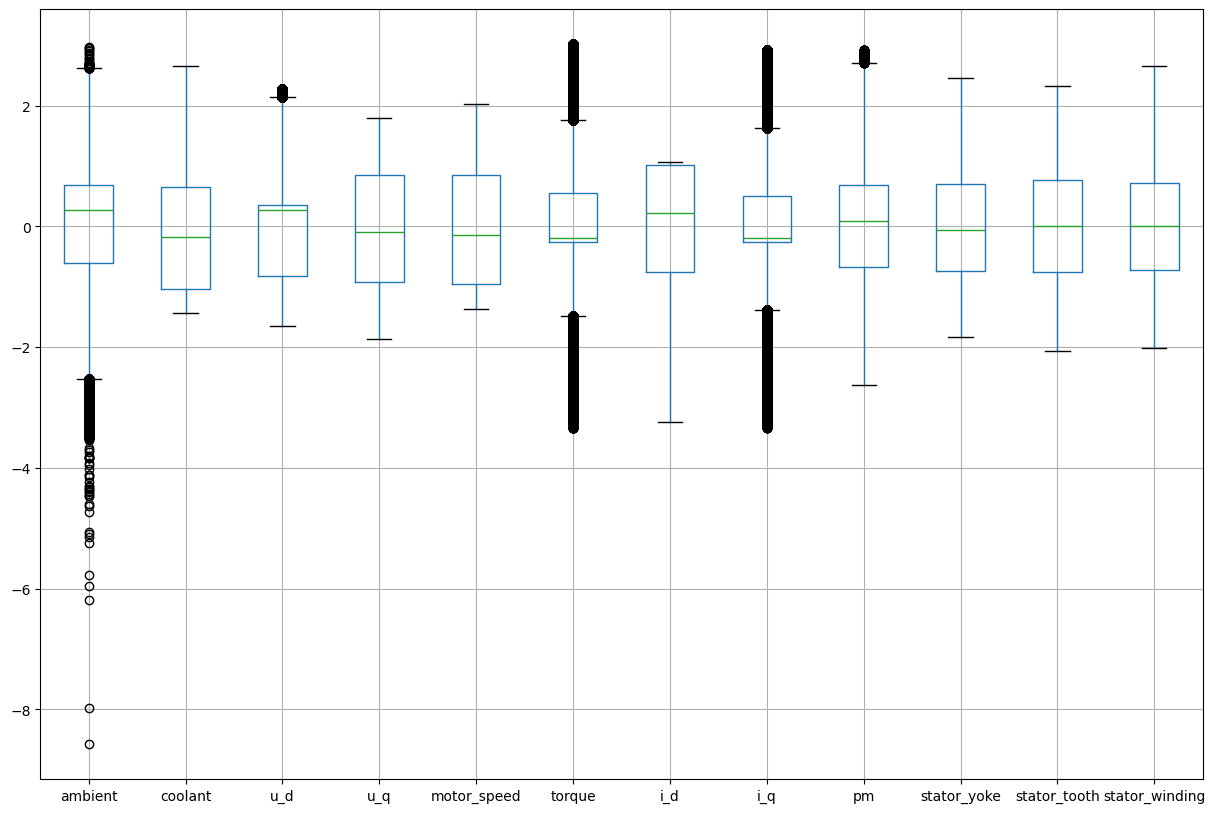

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
data.boxplot()
plt.show()

In [49]:
# IQR Method
Q1 = data['ambient'].quantile(0.25)
Q3 = data['ambient'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data['ambient'] < lower_bound) | (data['ambient'] > upper_bound)]
print("Outliers using IQR:\n", outliers_iqr)

Outliers using IQR:
          ambient   coolant       u_d       u_q  motor_speed    torque  \
36414  -3.698899 -1.288667 -1.126325  0.746681     1.483029  0.350814   
36415  -2.890745 -1.233934 -1.128157  0.746986     1.483026  0.350116   
51062   2.628669  1.012596 -1.167476  0.707446     1.483026  0.341965   
51063   2.677169  1.012875 -1.166438  0.710380     1.483027  0.342024   
51064   2.710575  1.013156 -1.164715  0.710822     1.483030  0.342076   
...          ...       ...       ...       ...          ...       ...   
947783 -2.780729  0.054789  0.951764  0.121202    -0.411380 -1.049816   
989728 -4.401607 -0.993057  1.006816  1.239116     1.941937 -0.609125   
989729 -5.239872 -1.078828  0.781064  1.368994     1.937356 -0.512008   
989730 -3.794825 -0.925217  0.789931  1.437498     1.919266 -0.509178   
989731 -2.759971 -0.814944  0.903029  1.432108     1.892712 -0.552516   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
36414  -1.078798  0.304409  0.14214

In [15]:
# Removing outliers for all numerical columns in a dataset
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_cleaned = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Dataset after removing outliers from all columns:")
print(data_cleaned)

Dataset after removing outliers from all columns:
         ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182   
1      -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133   
2      -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431   
3      -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636   
4      -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701   
...          ...       ...       ...       ...          ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114    -1.222428 -0.255640   
998066 -0.048839  0.320022  0.331701 -1.250655    -1.222437 -0.255640   
998067 -0.042350  0.307415  0.330946 -1.246852    -1.222430 -0.255640   
998068 -0.039433  0.302082  0.330987 -1.249505    -1.222432 -0.255640   
998069 -0.043803  0.312666  0.330830 -1.246590    -1.222431 -0.255640   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0     

### 3. Exploratory Data Analysis (EDA) & Visualization

In [16]:
# Understand patterns through visualizations# histograms, pairplots, heatmap, boxplots

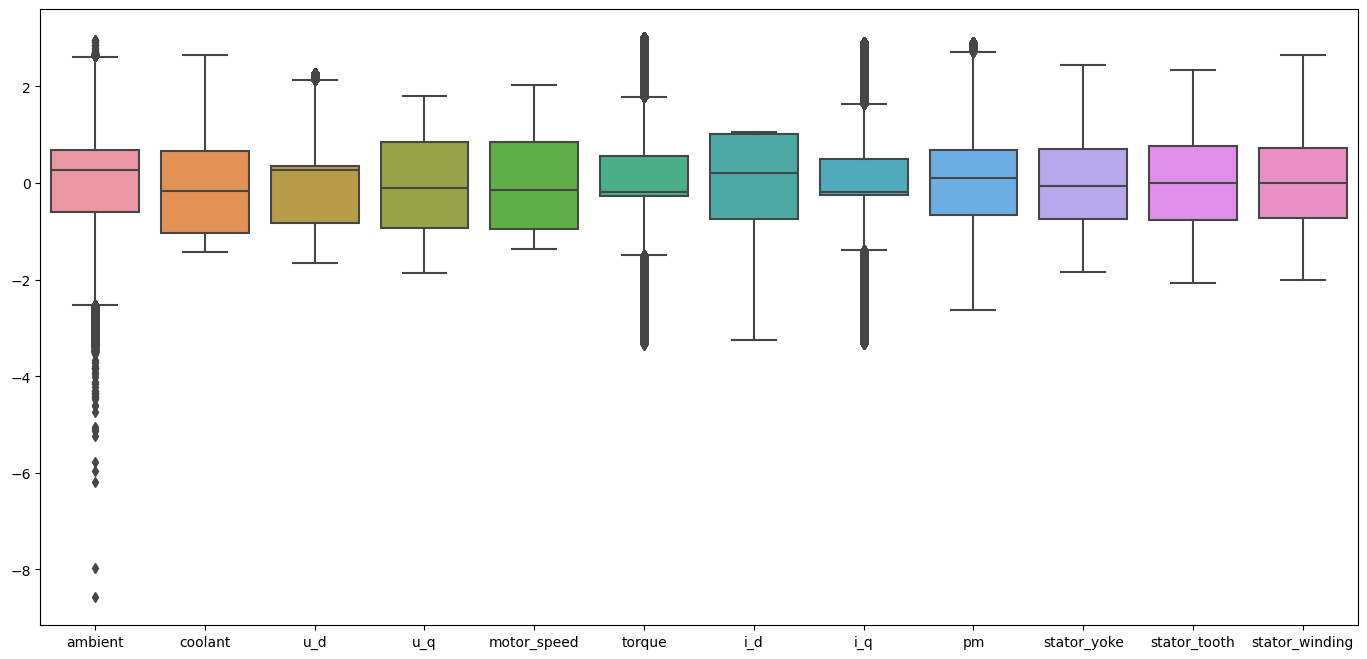

In [17]:
import seaborn as sns

plt.figure(figsize=(17,8))
sns.boxplot(data_cleaned)
plt.show()

In [18]:
data_cleaned.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64

In [19]:
data_cleaned.duplicated().sum()

0

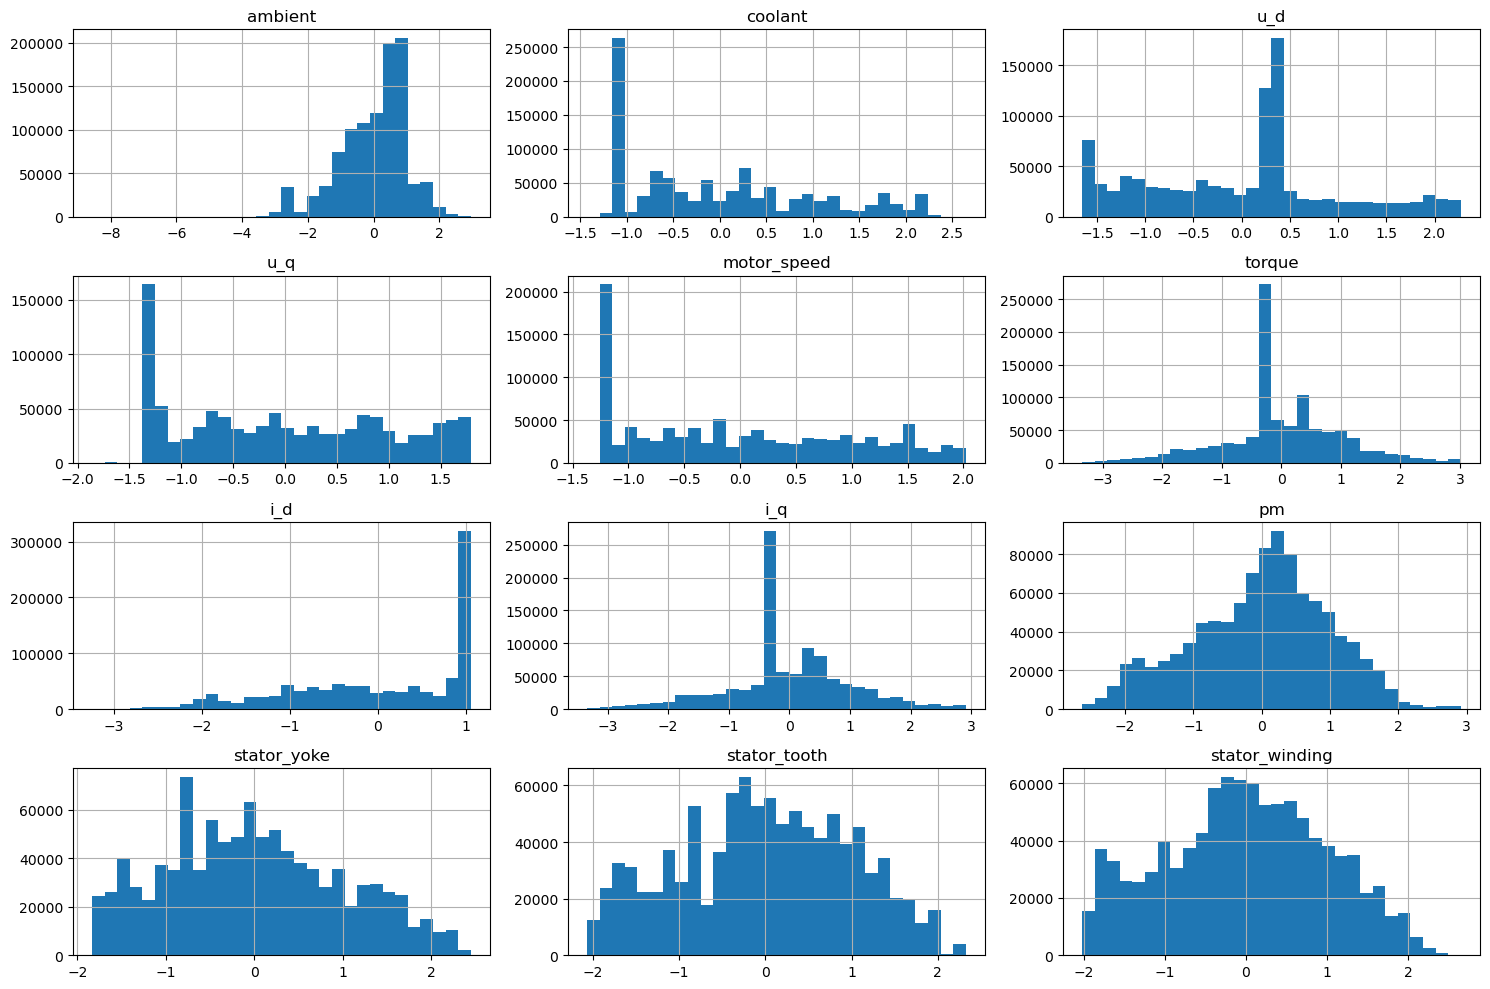

In [20]:
import matplotlib.pyplot as plt
data_cleaned.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [21]:
correlation=data_cleaned.corr()

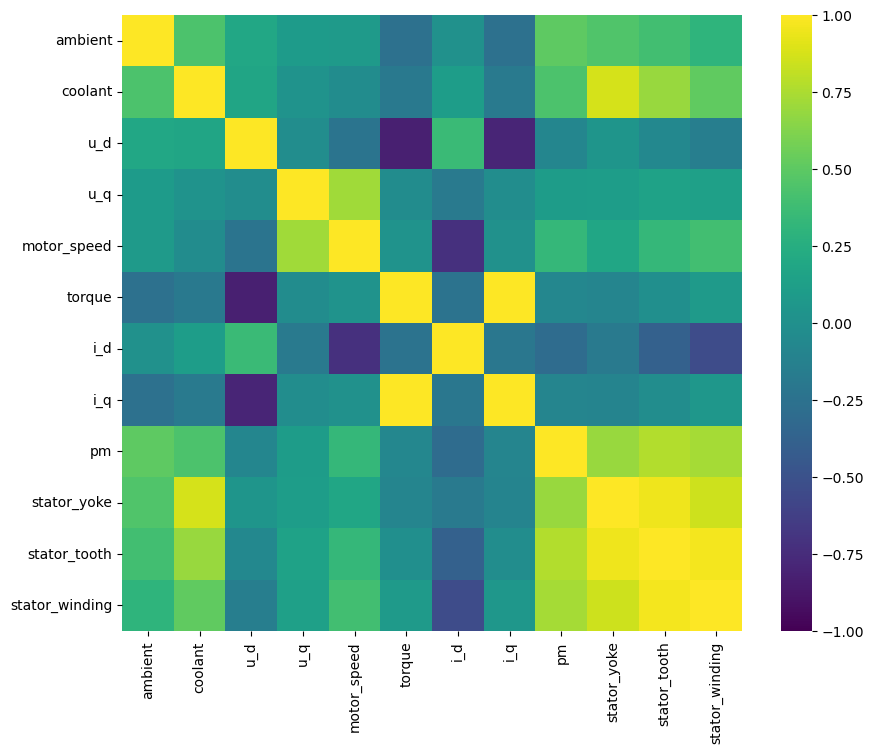

In [22]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='viridis')
plt.show()

### 4. Feature Selection & Feature Scaling

In [23]:
#  Goal: Select the most important features and scale them for better model performance.
# standardization or Normalization
# standardScaler or MinMaxScaler

###  5. Model Selection & Training

In [25]:
# Goal: Choose and train machine learning models.
# splitting datasets - test, train
# training multiple models
# Evaluating using MSE and R2

In [61]:
x = data_cleaned.drop(['motor_speed'], axis = 1)
y = data_cleaned['motor_speed']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (798456, 11) (798456,)
Testing data shape: (199614, 11) (199614,)


In [63]:
print("Minimum Motor Speed in Training Data:", y_train.min())

Minimum Motor Speed in Training Data: -1.3715293


In [64]:
y_train = y_train.clip(lower=0)  # Ensure all speeds are non-negative

In [65]:
print("Feature names used during training:", X_train.columns.tolist())

Feature names used during training: ['ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d', 'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding']


In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization (fit on training data)
data_scaled = scaler.fit_transform(data_cleaned)

# Convert back to DataFrame (retain column names)
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

print("Standardized Data:")
print(data_scaled)


Standardized Data:
         ambient   coolant       u_d       u_q  motor_speed    torque  \
0      -0.753416 -1.120454  0.323842 -1.289164    -1.214600 -0.247367   
1      -0.772669 -1.119032  0.325575 -1.288994    -1.214601 -0.246316   
2      -0.784378 -1.118693  0.328689 -1.293119    -1.214600 -0.246615   
3      -0.782408 -1.118776  0.329619 -1.293150    -1.214602 -0.245818   
4      -0.775467 -1.118787  0.331128 -1.294413    -1.214601 -0.245883   
...          ...       ...       ...       ...          ...       ...   
998065 -0.043894  0.336101  0.327389 -1.237541    -1.214600 -0.252836   
998066 -0.045245  0.314537  0.327616 -1.242071    -1.214609 -0.252836   
998067 -0.038711  0.301961  0.326859 -1.238277    -1.214602 -0.252836   
998068 -0.035774  0.296640  0.326900 -1.240924    -1.214604 -0.252836   
998069 -0.040173  0.307199  0.326743 -1.238017    -1.214603 -0.252836   

             i_d       i_q        pm  stator_yoke  stator_tooth  \
0       1.024560 -0.243174 -2.528584 

In [52]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R²: {r2_linear}")

Linear Regression MSE: 0.4981610123012963
Linear Regression R²: 0.5028928003040951


In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
y_pred_dt = decision_tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R²: {r2_dt}")

Decision Tree MSE: 0.44964836256760393
Decision Tree R²: 0.55130282610587


In [32]:
# Decision tree will be the best model. I'm telling based on previous data i've.

In [33]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Initialize the model
lasso_model = Lasso(alpha=0.1, random_state=42)

# Train the model on the training set
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [34]:
y_pred_Lasso = lasso_model.predict(X_test)
mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
r2_Lasso = r2_score(y_test, y_pred_Lasso)

print(f"Lasso Regression MSE: {mse_Lasso}")
print(f"Lasso Regression R²: {r2_Lasso}")

Lasso Regression MSE: 0.13625024041119088
Lasso Regression R²: 0.8640379841131846


In [35]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Initialize the model
ridge_model = Ridge(alpha=1, random_state=42)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

Ridge(alpha=1, random_state=42)

In [36]:
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R²: {r2_ridge}")

Ridge Regression MSE: 0.07195187034191675
Ridge Regression R²: 0.9282003370490179


In [37]:
# random forest will takes much time to be formed fully due to more estimators. Let's drop the estimators to 20.

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
forest_model = RandomForestRegressor(n_estimators=20, max_depth=10, min_samples_split=10, n_jobs=-1, random_state=42)

# Train the model on the training set
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [39]:
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Regressor MSE: {mse_forest}")
print(f"Random Forest Regressor R²: {r2_forest}")

Random Forest Regressor MSE: 0.004815577459378576
Random Forest Regressor R²: 0.9951946094402455


In [40]:
# Support Vector Machine
from sklearn.svm import SVR
# Initialize the model
svr_model = SVR(kernel='linear', C=0.1, epsilon=0.2)

# Train the model on the training set
svr_model.fit(X_train[:75000], y_train[:75000])

SVR(C=0.1, epsilon=0.2, kernel='linear')

In [41]:
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Machine MSE: {mse_svr}")
print(f"Support Vector Machine R²: {r2_svr}")

Support Vector Machine MSE: 0.07423690697698135
Support Vector Machine R²: 0.9259201341932946


In [42]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor MSE: {mse_knn}")
print(f"KNN Regressor R²: {r2_knn}")

KNN Regressor MSE: 0.0008314378930772434
KNN Regressor R²: 0.999170320935315


In [44]:
# Gradiant Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(n_estimators=25, learning_rate=0.3, max_depth=2, random_state=42)

# Train the model on the training set
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=25,
                          random_state=42)

In [45]:
y_pred_gbr = gbr_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradiant Boosting Regressor MSE: {mse_gbr}")
print(f"Gradiant Boosting Regressor R²: {r2_gbr}")

Gradiant Boosting Regressor MSE: 0.01634531213988193
Gradiant Boosting Regressor R²: 0.9836892648252894


In [46]:
# R2 values
metric_list = ['Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Gradient Boosting']
r2_values = [r2_linear, r2_Lasso, r2_ridge, r2_dt, r2_forest, r2_svr, r2_knn, r2_gbr]

final_metrics = pd.DataFrame( {"Metric_name": metric_list, "R2": r2_values}, index=None)

final_metrics.sort_values(by="R2", ascending=False)

,Metric_name,R2
3,Decision Tree,0.999705
6,KNN,0.999170
4,Random Forest,0.995195
7,Gradient Boosting,0.983689
2,Ridge,0.928200
0,Linear,0.928200
5,SVR,0.925920
1,Lasso,0.864038


###  6. Model Evaluation & Hyperparameter Tuning

In [47]:
#  Goal: Optimize model performance by fine-tuning hyperparameters.
# Use Cross-validation to check model stability.
# Apply GridSearchCV or RandomizedSearchCV to find the best hyperparameters.
# Compare before vs. after tuning performance.

In [56]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Limit tree depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required in leaf node
}

# Initialize Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [57]:
# Train Decision Tree with Best Parameters
best_dt = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

# Predictions with Optimized Model
y_pred_best_dt = best_dt.predict(X_test)

# Evaluation
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print(f"Decision Tree MSE (After Tuning): {mse_best_dt:.4f}")
print(f"Decision Tree R² (After Tuning): {r2_best_dt:.4f}")

Decision Tree MSE (After Tuning): 0.4496
Decision Tree R² (After Tuning): 0.5513


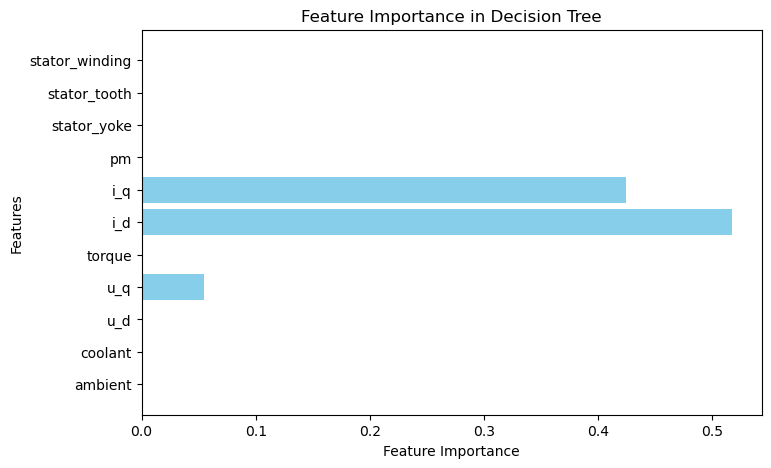

In [58]:
import matplotlib.pyplot as plt

feature_importances = best_dt.feature_importances_
features = X_train.columns

plt.figure(figsize=(8,5))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


### Deployment

In [59]:
import pickle

# Save the trained Decision Tree model again
with open("C:/Users/Bobby/DS_Basha/Projects/EMS_project/updated/decision_tree_model.pkl", 'wb') as model_file:
    pickle.dump(best_dt, model_file)

print("Model saved successfully!")

Model saved successfully!
